In [64]:
import numpy as np
import pandas as pd

# Preparing the data

In [65]:
# csv file 1. list of pokemon in each battle and the resulting winner.
df_winner = pd.read_csv('combats.csv', delimiter=',')
df_winner.head(10)

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151
5,657,752,657
6,192,134,134
7,73,545,545
8,220,763,763
9,302,31,31


In [66]:
# csv file 2. list of pokemon's stats.
df_stats = pd.read_csv('pokemons.csv', delimiter=',')
df_stats.head(10)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,6,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
6,7,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
7,8,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,9,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,1,False


# Cleaning the data

In [67]:
# Used a DBMS to relate the pokemon in each battle to its stats.
# Then used excel to concatenate and format the desired data. Also included a column
# 'Won' to show whether the first listed animal in each battle won or not.
# This will help the a machine learning algorthim in predicting the likelihood of a win.
df_battle = pd.read_csv('pokemon.csv', delimiter=',')
df_battle.head()

,BattleID,First,fName,fType,fType#,fHP,fAttack,fDefense,fSpeed,Second,...,DiffHp,DiffAttack,DiffDefense,DiffSpeed,HpAttack,HpDefense,HpSpeed,AttackDef,AttackSpeed,DefSpeed
0,1,266,Larvitar,Rock,16,50,64,50,41,298,...,-20,-6,10,-19,-20,10,-10,24,4,-10
1,2,702,Virizion,Grass,10,91,90,72,108,701,...,0,-39,-18,0,-38,1,-17,0,-18,-36
2,3,191,Togetic,Fairy,5,55,40,85,40,668,...,-20,-35,10,0,-20,-20,15,-35,0,45
3,4,237,Slugma,Fire,7,40,40,40,20,683,...,-37,-80,-50,-28,-80,-50,-8,-50,-8,-8
4,5,151,Omastar,Rock,16,70,60,125,55,231,...,50,50,-105,50,60,-160,65,-170,55,120


In [68]:
# Simplified the dataframe to just numeric values.
df_nums=df_battle[['BattleID', 'First', 'fType#', 'fHP', 'fAttack', 'fDefense', 'fSpeed', 'Second', 'sType#', 'sHP', 'sAttack', 'sDefense', 'sSpeed', 'Won']]
df_nums.head()

,BattleID,First,fType#,fHP,fAttack,fDefense,fSpeed,Second,sType#,sHP,sAttack,sDefense,sSpeed,Won
0,1,266,16,50,64,50,41,298,10,70,70,40,60,0
1,2,702,10,91,90,72,108,701,16,91,129,90,108,0
2,3,191,5,55,40,85,40,668,15,75,75,75,40,0
3,4,237,7,40,40,40,20,683,3,77,120,90,48,0
4,5,151,16,70,60,125,55,231,1,20,10,230,5,1


In [69]:
# In determining a winner of a battle, attributes of the first listed pokemon 
# must be compared against the second. It would not be accurate for a ML algorithm
# to use the first pokemon's stats as sole factors in the outcome.
# Here, we have combined stats and attributes of the first and second pokemon
# into one column using Excel e.g. the difference between Pokemon 1's HP and
# 2's HP is in a new column called 'DiffHp'. Also combined the types of the two
# pokemon into one column, "TypeCom", and used a DBMS to give it a respective number.
df_comb=df_battle[['BattleID', 'First', 'Second', 'TypeCom', 'TypeCom#', 'TypeCom#S', 'DiffHp', 'DiffAttack', 'DiffDefense', 'DiffSpeed', 'HpAttack', 'HpDefense', 'HpSpeed', 'AttackDef', 'AttackSpeed','DefSpeed', 'Won']]
df_comb.head()

,BattleID,First,Second,TypeCom,TypeCom#,TypeCom#S,DiffHp,DiffAttack,DiffDefense,DiffSpeed,HpAttack,HpDefense,HpSpeed,AttackDef,AttackSpeed,DefSpeed,Won
0,1,266,298,RockGrass,280,104,-20,-6,10,-19,-20,10,-10,24,4,-10,0
1,2,702,701,GrassRock,178,221,0,-39,-18,0,-38,1,-17,0,-18,-36,0
2,3,191,668,FairyPsychic,87,26,-20,-35,10,0,-20,-20,15,-35,0,45,0
3,4,237,683,FireDragon,111,105,-37,-80,-50,-28,-80,-50,-8,-50,-8,-8,0
4,5,151,231,RockBug,271,203,50,50,-105,50,60,-160,65,-170,55,120,1


# Visualizing the data

In [70]:
    import sklearn as sk
    import matplotlib
    import matplotlib.pyplot as plt
    from IPython.display import display
    from sklearn.model_selection import train_test_split
    from sklearn import metrics
    from sklearn.metrics import accuracy_score
    import seaborn as sns
    from sklearn import tree
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix
    from sklearn.neural_network import MLPClassifier
    %matplotlib inline

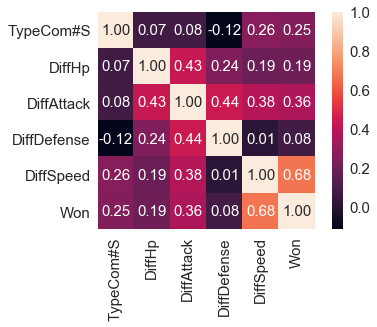

In [71]:
# Correlation heat maps to see how all the different combined features
# correlate to the outcome of 'Won' Used this in the feature selection process. 
# For example, the DiffSpeed column has a high correlation to the outcome of 'Won'.
# Heatmap 1/2.
cols = ['TypeCom#S', 'DiffHp', 'DiffAttack', 'DiffDefense', 'DiffSpeed', 'Won']
cm = np.corrcoef(df_comb[cols].values, rowvar=0)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
    cbar=True,
    annot=True,
    square=True,
    fmt='.2f',
    annot_kws={'size': 15},
    yticklabels=cols,
    xticklabels=cols)
plt.show()

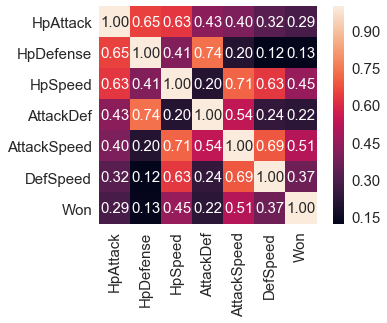

In [72]:
# Heatmap 2/2 (more features)
cols = ['HpAttack', 'HpDefense', 'HpSpeed', 'AttackDef', 'AttackSpeed','DefSpeed', 'Won']
cm = np.corrcoef(df_comb[cols].values, rowvar=0)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
    cbar=True,
    annot=True,
    square=True,
    fmt='.2f',
    annot_kws={'size': 15},
    yticklabels=cols,
    xticklabels=cols)
plt.show()

In [73]:
# also used Excel pivot tables and graphs to visualize how the comparison
# of pokemon stats between the two pokemon correlated to the outcome of a
# battle to help further with feature selection for the model. For example,
# the first graph shows that the difference in HP between the first and
# second pokemon does not correlate much to whether the first pokemon
# would win or not. However, the second graph shows a steady correlation
# that the greater the first pokemon's attack points are over the seconds,
# the higher the percentage of battles they've won in that situation.

# Did this visualization with all of the features.

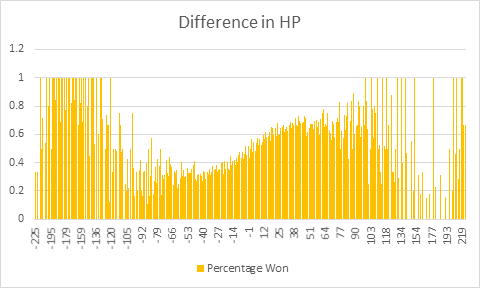
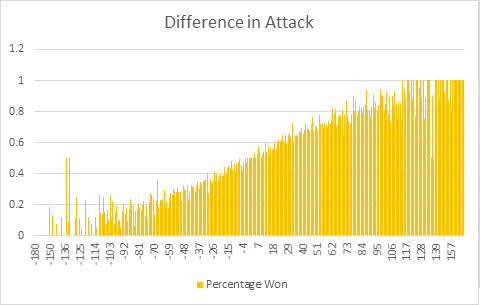

In [74]:
# The 'TypeComS#' is an important feature that is different from
# the rest of the stats. This feature is the type of the first
# pokemon vs. the second. Used Excel here to see how the different
# fighting type combinations affect the outcome of a battle. For
# example, whenever a fighting type pokemon faces a flying type
# pokemon, the fighting type pokemon has lost a great percentage of
# the time. The graph below shows these combinations and the percentage
# of battles in this scenario where the first pokemon has won against
# the second.

# Issue here: scikit doesn't like categorical features and when
# turning them into numeric values, it treats is as continuous numeric
# values. This gave me an issue with this column, as it is a
# categorical feature. Looked up alternative posibilities: one hot
# encoding for this column would take up too many resources as there are
# 324 different unique values. Instead,I sorted the type combinations by
# how well they do in battle and then assigned each an index. So the
# higher the type combination number, the better the first pokemon's
# type will do in battle against the second pokemon's type.

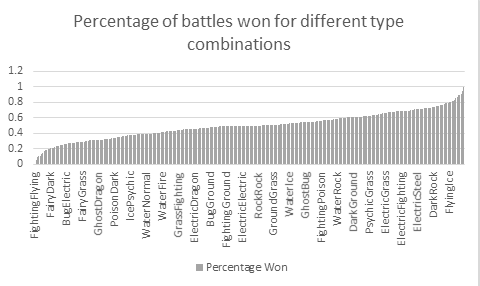

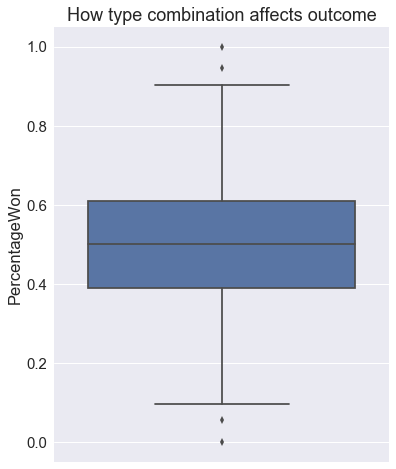

In [75]:
# This is a box plot that shows how much 'TypeComS' affects the
# outcome of a battle. As we saw above, the fighting pokemon
# have historically shown a very small chance of beating flying pokemon.
# On the flip side, dark pokemon tend to perform really
# well against rock pokemon. But how much does this make a difference?
# This box plot shows that although some battles are
# largely influenced by the types of the two pokemon, the majority
# of the type combinations don't affect the outcome much. The blue box
# in the box plot is the majority of the type combinations, and it shows
# that those percentage of battles won are near 50%. That means that for
# many of the type combinations, other factors have to come into play
# like the pokemons' hp, attack, speed, and defense.
df_pwbtc = pd.read_csv('pwbtc.csv', delimiter=',')
plt.figure(figsize=(6,8))
plt.title("How type combination affects outcome")
ax = sns.boxplot(y=df_pwbtc['PercentageWon'], data=df_pwbtc)

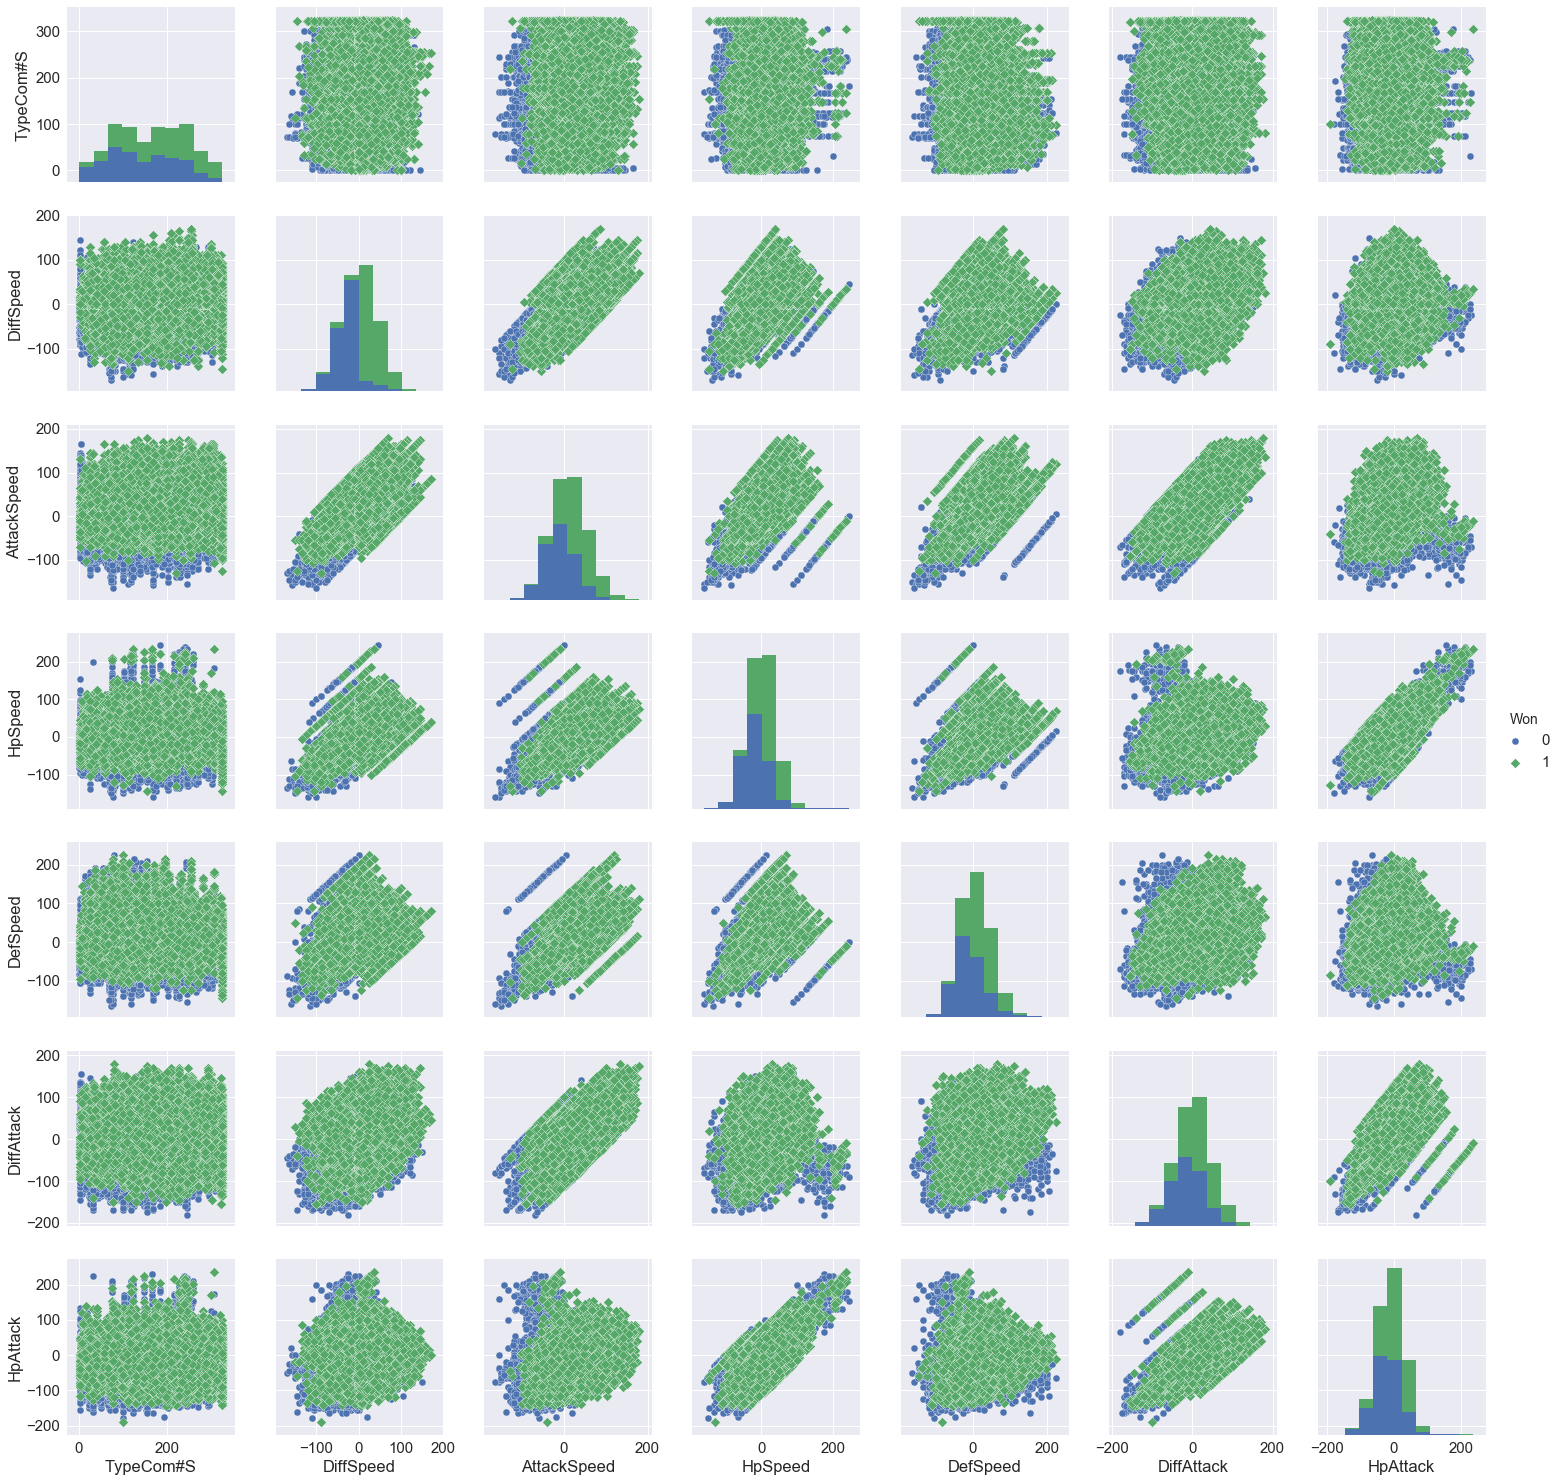

In [76]:
# Shows that it's going to be necessary to use multiple features
# for an algorithm to accurately determine a battle result.
selected_feature_names=['TypeCom#S','DiffSpeed','AttackSpeed','HpSpeed','DefSpeed','DiffAttack','HpAttack']
sns.pairplot(df_comb, hue='Won', vars=selected_feature_names, markers=["o", "D"], size=3)

# Data preparation

In [77]:
# Using the correlation heat maps, Excel pivot tables, and Excel graphs
# mentioned above, I chose these features to ultimately use in the machine learning models.
X = df_comb[['TypeCom#S','DiffSpeed','AttackSpeed','HpSpeed','DefSpeed','DiffAttack','HpAttack']]
y = df_comb['Won']

In [78]:
#Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)
print('Train shape:', X_train.shape, y_train.shape)
print('Test shape:', X_test.shape, y_test.shape)

# Scaling the data (TypeComS# has a broader range of values than the rest and
# did not want it to contribute more)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Train shape: (75000, 7) (75000,)
Test shape: (25000, 7) (25000,)


# Training the model - Decision Tree

In [79]:
#Decision Tree
clf_dt=DecisionTreeClassifier(criterion = "entropy", splitter="best", max_depth=5, min_samples_split=10, min_samples_leaf=5)
clf_dt.fit(X_train, y_train)
# Decision tree was initially overfitting to the train set a lot. Messed around
# with the parameters, and by limiting the max depth quite a bit, that turned out
# most effective in increasing the accuracy and controlling overfitting.

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


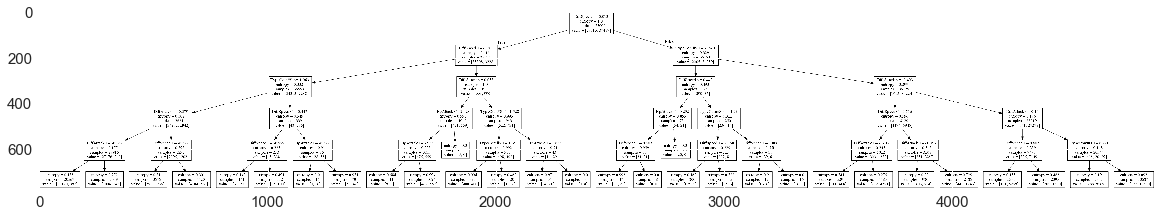

In [80]:
import graphviz
from sklearn.tree import export_graphviz
import pydotplus
import io
from scipy import misc

import os     

os.environ["PATH"] += os.pathsep + 'C:/ProgramData/Anaconda3/Library/bin/graphviz'



features = ['TypeCom#S','DiffSpeed','AttackSpeed','HpSpeed','DefSpeed','DiffAttack','HpAttack']

path = ("/Users/nhies/Documents/")
def show_tree(tree, features, path):
    f = io.StringIO()
    export_graphviz(tree, out_file=f, feature_names=features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = misc.imread(path)
    plt.rcParams["figure.figsize"]=(20,20)
    plt.imshow(img)

show_tree(clf_dt, features, 'dt_tree.png')

## Evaluation Metrics

In [81]:
y_pred= clf_dt.predict(X_test)
print(accuracy_score(y_test,y_pred))

#Cross validation - more realistic overall model score. Here, the accuracy score is
# very consistent in all of the folds.
from sklearn.model_selection import KFold, cross_val_score
from scipy.stats import sem

def evaluate_cross_validation(clf,X,y,K):
    kf = KFold(K,shuffle = True, random_state = 0)
    scores = cross_val_score(clf,X,y,cv=kf)
    print (scores)
    print(("Mean score: {0:.3f} (+/-{1:.3f})").format(np.mean(scores), sem(scores)))
           
evaluate_cross_validation(clf_dt,X_train, y_train,5)          

0.93208
[0.933      0.934      0.93553333 0.9362     0.93253333]
Mean score: 0.934 (+/-0.001)


In [82]:
#Confusion Matrix
#     In the event of an inaccurate prediction, it would be preferred for a
#     pokemon trainer to not fight a battle that they could have potentially
#     won as opposed to fighting a predicted victory battle where they result in a loss.
#     Thus in this scenario, False Positives would like to be avoided. In
#     manipulating parameters for the model, I was also looking to minimize this.
cm = confusion_matrix(y_test, y_pred)
result=['0','1']
resultGhetto=['ACTUAL 0', '       1']
df_cm = pd.DataFrame(cm, index = resultGhetto, columns = result)
print("          PREDICTED")
print(df_cm)

          PREDICTED
              0      1
ACTUAL 0  11616    871
       1    827  11686


In [83]:
#Classification Report
result=['(lost) 0','(won) 1']
print(classification_report(y_test, y_pred, target_names=result))

             precision    recall  f1-score   support

   (lost) 0       0.93      0.93      0.93     12487
    (won) 1       0.93      0.93      0.93     12513

avg / total       0.93      0.93      0.93     25000



## Prediction

In [94]:
#Brock's Rock Gym:
    #Geodude
    #Onix
    #Sudowoodo
    #Omastar
    #Rhyhorn
    #Kabutops

#Your available pokemon:
    #Clauncher
    #Joltik
    #Lapras
    #Mega Tyranitar
    #Serperior
    #Duskull
    #Typhlosion
    #Scraggy

print('Gym Battles:')
#Battle! You are facing Brock's Rock Type Pokemon Gym. The first pokemon you'll fight is Geodude. Will your Clauncher be able
#to prevail in the fight?
#Clauncher: water type, HP: 50, Attack: 53, Defense: 62, Speed: 44
#Geodude: rock type, HP: 40, Attack: 80, Defense: 100, Speed: 20
#X = ['TypeCom#S','DiffSpeed','AttackSpeed','HpSpeed','DefSpeed','DiffAttack','HpAttack']
gymBattle1 = scaler.transform([['229','24','33','30','42','-27','-30']])
print("Predicted outcome of Clauncher v. Geodude:", clf_dt.predict(gymBattle1))

#Battle! Joltik vs. Onix
#Joltik: bug type, HP: 50, Attack: 47, Defense: 50, Speed: 65
#Onix: rock type, HP: 35, Attack: 45, Defense: 160, Speed: 70
#X = ['TypeCom#S','DiffSpeed','AttackSpeed','HpSpeed','DefSpeed','DiffAttack','HpAttack']
gymBattle2 = scaler.transform([['122','-15','-23','-20','-20','-15','5']])
print("Predicted outcome of Joltik vs Onix:", clf_dt.predict(gymBattle2))

#Battle! Lapras vs. Onix
#Lapras: water type, HP: 130, Attack: 85, Defense: 80, Speed: 60
#Onix: rock type, HP: 35, Attack: 45, Defense: 160, Speed: 70
#X = ['TypeCom#S','DiffSpeed','AttackSpeed','HpSpeed','DefSpeed','DiffAttack','HpAttack']
gymBattle3 = scaler.transform([['229','-10','15','60','10','40','95']])
print("Predicted outcome of Lapras vs Onix:", clf_dt.predict(gymBattle3))

#Battle! Mega Tyranitar vs. Onix
#Mega Tyranitar: rock type, HP: 100, Attack: 164, Defense: 150, Speed: 71
#Onix: rock type, HP: 35, Attack: 45, Defense: 160, Speed: 70
#X = ['TypeCom#S','DiffSpeed','AttackSpeed','HpSpeed','DefSpeed','DiffAttack','HpAttack']
gymBattle4 = scaler.transform([['169','1','94','30','80','119','55']])
print("Predicted outcome of Mega Tyranitar vs Onix:", clf_dt.predict(gymBattle4))

#Battle! Joltik vs. Sudowoodo
#Joltik: bug type, HP: 50, Attack: 47, Defense: 50, Speed: 65
#Sudowoodo: rock type, HP: 70, Attack: 100, Defense: 15, Speed: 30
#X = ['TypeCom#S','DiffSpeed','AttackSpeed','HpSpeed','DefSpeed','DiffAttack','HpAttack']
gymBattle5 = scaler.transform([['122','35','17','20','20','-53','-50']])
print("Predicted outcome of Joltik vs. Sudowoodo:", clf_dt.predict(gymBattle5))

#Battle! Lapras vs. Omaster
#Lapras: water type, HP: 130, Attack: 85, Defense: 80, Speed: 60
#Omaster: rock type, HP: 70, Attack: 60, Defense: 125, Speed: 55
#X = ['TypeCom#S','DiffSpeed','AttackSpeed','HpSpeed','DefSpeed','DiffAttack','HpAttack']
gymBattle6 = scaler.transform([['229','15','30','75','25','25','70']])
print("Predicted outcome of Lapras vs Omaster:", clf_dt.predict(gymBattle6))

#Battle! Serperior vs. Rhyhorn
#Serperior: grass type, HP: 75, Attack: 75, Defense: 95, Speed: 113
#Rhyhorn: ground type, HP: 80, Attack: 85, Defense: 95, Speed: 25
#X = ['TypeCom#S','DiffSpeed','AttackSpeed','HpSpeed','DefSpeed','DiffAttack','HpAttack']
gymBattle7 = scaler.transform([['144','88','50','50','70','-10','-10']])
print("Predicted outcome of Serperior vs. Rhyhorn:", clf_dt.predict(gymBattle7))

#Battle! Duskull vs. Kabutops
#Duskull: ghost type, HP: 20, Attack: 40, Defense: 90, Speed: 25
#Kabutops: rock type, HP: 60, Attack: 115, Defense: 105, Speed: 80
#X = ['TypeCom#S','DiffSpeed','AttackSpeed','HpSpeed','DefSpeed','DiffAttack','HpAttack']
gymBattle8 = scaler.transform([['246','-55','-40','-60','10','-75','-95']])
print("Predicted outcome of Duskull vs. Kabutops:", clf_dt.predict(gymBattle8))

#Battle! Typhlosion vs. Kabutops
#Typhlosion: fire type, HP: 78, Attack: 84, Defense: 78, Speed: 100
#Kabutops: rock type, HP: 60, Attack: 115, Defense: 105, Speed: 80
#X = ['TypeCom#S','DiffSpeed','AttackSpeed','HpSpeed','DefSpeed','DiffAttack','HpAttack']
gymBattle9 = scaler.transform([['236','20','4','-2','-2','-31','-37']])
print("Predicted outcome of Typhlosion vs. Kabutops:", clf_dt.predict(gymBattle9))

#Battle! Scraggy vs. Sudowoodo
#Scraggy: dark type, HP: 50, Attack: 75, Defense: 70, Speed: 48
#Sudowoodo: rock type, HP: 70, Attack: 100, Defense: 15, Speed: 30
#X = ['TypeCom#S','DiffSpeed','AttackSpeed','HpSpeed','DefSpeed','DiffAttack','HpAttack']
gymBattle10 = scaler.transform([['301','18','45','20','40','-25','-50']])
print("Predicted outcome of Scraggy vs. Sudowoodo:", clf_dt.predict(gymBattle10))


#-------------------------------------------------------
#Other Battles
print('\nOther battles:')

#Battle! You are out in the wild with Slugma and you see a wild Zigzagoon. Should you fight or should you flee?!
#Slugma: fire type, HP:40, Attack:40, Defense:40, Speed:20
#Zigzagoon: normal type, HP:38, Attack:30, Defense:41 Speed: 60
#X = ['TypeCom#S','DiffSpeed','AttackSpeed','HpSpeed','DefSpeed','DiffAttack','HpAttack']
newBattle1 = scaler.transform([['202','-40','-20','-20','-20','10','10']])
print("Predicted outcome of battle 1:", clf_dt.predict(newBattle1))

#Battle! Team Rocket has come and is telling you to prepare for trouble! They are about to unveil their newly captured
#pokemon, Xatu. Your Nidoking is the only pokemon at full health right now and the others have fainted. Will your Nidoking
#defeat Xatu and protect your name?
#Nidoking: poison type, HP: 81, Attack: 102, Defense: 77, Speed: 85
#Xatu: psychic type, HP: 65, Attack: 75, Defense: 70, Speed: 95
#X = ['TypeCom#S','DiffSpeed','AttackSpeed','HpSpeed','DefSpeed','DiffAttack','HpAttack']
newBattle3 = scaler.transform([['244','10','-10','-20','-15','-27','-37']])
print("Predicted outcome of battle 3:", clf_dt.predict(newBattle3))

#Battle! You see a Mega Gengar out in the wild and want to capture it! But in order to do that, your pokemon has to be
#able to take it on and win if needed. Can your Gothitelle do that?
#Gothitelle: psychic type, HP: 70, Attack: 55, Defense: 95, Speed: 65
#Mega Gengar: ghost type, HP: 60, Attack: 65, Defense: 80, Speed: 130
#X = ['TypeCom#S','DiffSpeed','AttackSpeed','HpSpeed','DefSpeed','DiffAttack','HpAttack']
newBattle4 = scaler.transform([['211','-65','-75','-60','-35','-10','-10']])
print("Predicted outcome of battle 4:", clf_dt.predict(newBattle4))

Gym Battles:
Predicted outcome of Clauncher v. Geodude: [1]
Predicted outcome of Joltik vs Onix: [0]
Predicted outcome of Lapras vs Onix: [0]
Predicted outcome of Mega Tyranitar vs Onix: [1]
Predicted outcome of Joltik vs. Sudowoodo: [1]
Predicted outcome of Lapras vs Omaster: [1]
Predicted outcome of Serperior vs. Rhyhorn: [1]
Predicted outcome of Duskull vs. Kabutops: [0]
Predicted outcome of Typhlosion vs. Kabutops: [1]
Predicted outcome of Scraggy vs. Sudowoodo: [1]

Other battles:
Predicted outcome of battle 1: [0]
Predicted outcome of battle 3: [1]
Predicted outcome of battle 4: [0]


# Neural Network (Multi-layer Perceptron)

In [85]:
# Neural Network - I was a little bit more blind here about manipulating parameters.
# Didn't know exactly how adding or removing a hidden layer/neurons in each layer and
# the learning rate changed my specific model how it did, but I just tinkered with it
# until I was getting the best results that I could. Googling my questions provided very vague answers.
clf_nn_mlp = MLPClassifier(hidden_layer_sizes=(7,7,7), verbose=True, learning_rate_init=0.001, random_state = 0)
clf_nn_mlp.fit(X_train,y_train)

Iteration 1, loss = 0.51602554
Iteration 2, loss = 0.30884395
Iteration 3, loss = 0.26103562
Iteration 4, loss = 0.22328642
Iteration 5, loss = 0.20977871
Iteration 6, loss = 0.20304355
Iteration 7, loss = 0.19918565
Iteration 8, loss = 0.19697678
Iteration 9, loss = 0.19520032
Iteration 10, loss = 0.19448186
Iteration 11, loss = 0.19359676
Iteration 12, loss = 0.19316982
Iteration 13, loss = 0.19277397
Iteration 14, loss = 0.19247379
Iteration 15, loss = 0.19207080
Iteration 16, loss = 0.19196115
Iteration 17, loss = 0.19160811
Iteration 18, loss = 0.19144430
Iteration 19, loss = 0.19138827
Iteration 20, loss = 0.19111711
Iteration 21, loss = 0.19107913
Iteration 22, loss = 0.19083629
Iteration 23, loss = 0.19064182
Iteration 24, loss = 0.19068138
Iteration 25, loss = 0.19037590
Iteration 26, loss = 0.19028119
Iteration 27, loss = 0.19017364
Iteration 28, loss = 0.18985346
Iteration 29, loss = 0.18977975
Iteration 30, loss = 0.18986653
Iteration 31, loss = 0.18972706
Training loss did

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(7, 7, 7), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=True,
       warm_start=False)

## Evaluation Metrics

0.18972706222038713


Text(0,0.5,'Loss')

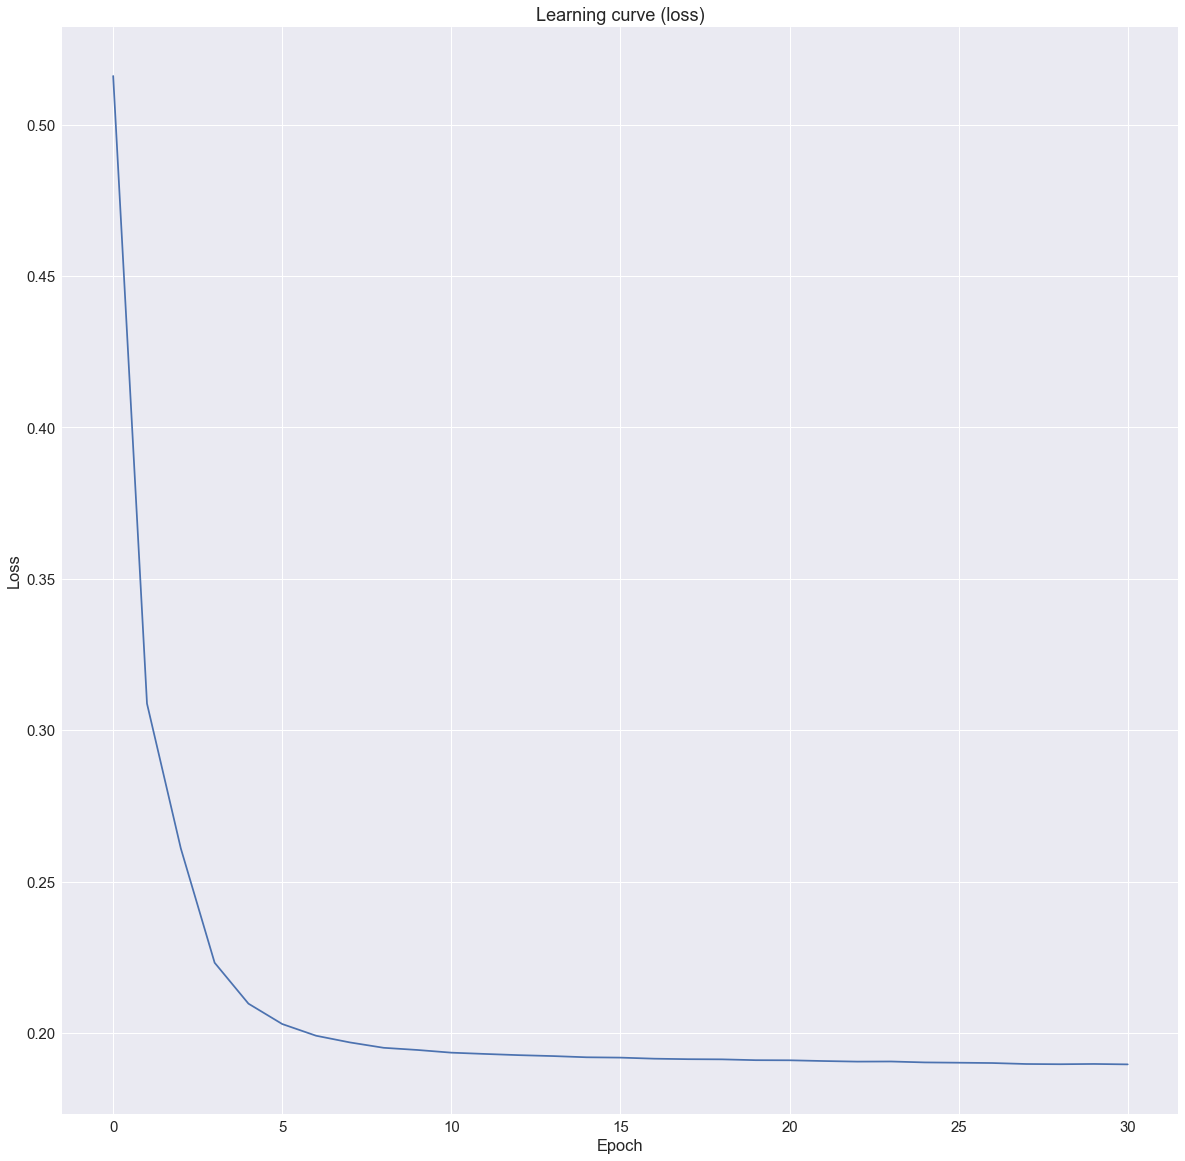

In [86]:
print(clf_nn_mlp.loss_)

plt.plot(clf_nn_mlp.loss_curve_)
plt.title('Learning curve (loss)')
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [87]:
y_pred= clf_nn_mlp.predict(X_test)
print(accuracy_score(y_test,y_pred))

#Cross validation. Ended up very similar to results from the decision tree in terms of overall accuracy.
evaluate_cross_validation(clf_nn_mlp,X_train, y_train,5)          

0.9318
Iteration 1, loss = 0.55851194
Iteration 2, loss = 0.32417516
Iteration 3, loss = 0.28721886
Iteration 4, loss = 0.24718383
Iteration 5, loss = 0.22260322
Iteration 6, loss = 0.21268863
Iteration 7, loss = 0.20597465
Iteration 8, loss = 0.20115214
Iteration 9, loss = 0.19836706
Iteration 10, loss = 0.19633410
Iteration 11, loss = 0.19495682
Iteration 12, loss = 0.19427320
Iteration 13, loss = 0.19359051
Iteration 14, loss = 0.19310145
Iteration 15, loss = 0.19276546
Iteration 16, loss = 0.19258762
Iteration 17, loss = 0.19204528
Iteration 18, loss = 0.19190086
Iteration 19, loss = 0.19171852
Iteration 20, loss = 0.19152944
Iteration 21, loss = 0.19109366
Iteration 22, loss = 0.19127009
Iteration 23, loss = 0.19073476
Iteration 24, loss = 0.19073035
Iteration 25, loss = 0.19063990
Iteration 26, loss = 0.19057996
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.55777493
Iteration 2, loss = 0.32438613
Iteration 3, loss

In [88]:
# Confusion Matrix. With the neural network, the model ended up predicting more battles
# overall to end in a victory of the first pokemon compared to the decision tree. It did
# correctly predict more victories, which helped the accuracy, but it also incorrectly
# predicted more wins that would have been losses, and as a result, did not minimize false
# positives as well as the decision tree.
cm = confusion_matrix(y_test, y_pred)
result=['0','1']
resultGhetto=['ACTUAL 0', '       1']
df_cm = pd.DataFrame(cm, index = resultGhetto, columns = result)
print("          PREDICTED")
print(df_cm)

          PREDICTED
              0      1
ACTUAL 0  11569    918
       1    787  11726


In [89]:
# Classification Report
result=['(lost) 0','(won) 1']
print(classification_report(y_test, y_pred, target_names=result))

             precision    recall  f1-score   support

   (lost) 0       0.94      0.93      0.93     12487
    (won) 1       0.93      0.94      0.93     12513

avg / total       0.93      0.93      0.93     25000



## Prediction

In [93]:
#Brock's Rock Gym:
    #Geodude
    #Onix
    #Sudowoodo
    #Omastar
    #Rhyhorn
    #Kabutops

#Your available pokemon:
    #Clauncher
    #Joltik
    #Lapras
    #Mega Tyranitar
    #Serperior
    #Duskull
    #Typhlosion
    #Scraggy
    
print('Gym Battles:')
#Battle! You are facing Brock's Rock Type Pokemon Gym. The first pokemon you'll fight is Geodude. Will your Clauncher be able
#to prevail in the fight?
#Clauncher: water type, HP: 50, Attack: 53, Defense: 62, Speed: 44
#Geodude: rock type, HP: 40, Attack: 80, Defense: 100, Speed: 20
#X = ['TypeCom#S','DiffSpeed','AttackSpeed','HpSpeed','DefSpeed','DiffAttack','HpAttack']
gymBattle1 = scaler.transform([[229,24,33,30,42,-27,-30]])
print("Predicted outcome of Clauncher v. Geodude:", clf_nn_mlp.predict(gymBattle1))

#Battle! Joltik vs. Onix
#Joltik: bug type, HP: 50, Attack: 47, Defense: 50, Speed: 65
#Onix: rock type, HP: 35, Attack: 45, Defense: 160, Speed: 70
#X = ['TypeCom#S','DiffSpeed','AttackSpeed','HpSpeed','DefSpeed','DiffAttack','HpAttack']
gymBattle2 = scaler.transform([[122,-15,-23,-20,-20,-15,5]])
print("Predicted outcome of Joltik vs Onix:", clf_nn_mlp.predict(gymBattle2))

#Battle! Lapras vs. Onix
#Lapras: water type, HP: 130, Attack: 85, Defense: 80, Speed: 60
#Onix: rock type, HP: 35, Attack: 45, Defense: 160, Speed: 70
#X = ['TypeCom#S','DiffSpeed','AttackSpeed','HpSpeed','DefSpeed','DiffAttack','HpAttack']
gymBattle3 = scaler.transform([[229,-10,15,60,10,40,95]])
print("Predicted outcome of Lapras vs Onix:", clf_nn_mlp.predict(gymBattle3))

#Battle! Mega Tyranitar vs. Onix
#Mega Tyranitar: rock type, HP: 100, Attack: 164, Defense: 150, Speed: 71
#Onix: rock type, HP: 35, Attack: 45, Defense: 160, Speed: 70
#X = ['TypeCom#S','DiffSpeed','AttackSpeed','HpSpeed','DefSpeed','DiffAttack','HpAttack']
gymBattle4 = scaler.transform([[169,1,94,30,80,119,55]])
print("Predicted outcome of Mega Tyranitar vs Onix:", clf_nn_mlp.predict(gymBattle4))

#Battle! Joltik vs. Sudowoodo
#Joltik: bug type, HP: 50, Attack: 47, Defense: 50, Speed: 65
#Sudowoodo: rock type, HP: 70, Attack: 100, Defense: 15, Speed: 30
#X = ['TypeCom#S','DiffSpeed','AttackSpeed','HpSpeed','DefSpeed','DiffAttack','HpAttack']
gymBattle5 = scaler.transform([[122,35,17,20,20,-53,-50]])
print("Predicted outcome of Joltik vs. Sudowoodo:", clf_nn_mlp.predict(gymBattle5))

#Battle! Lapras vs. Omaster
#Lapras: water type, HP: 130, Attack: 85, Defense: 80, Speed: 60
#Omaster: rock type, HP: 70, Attack: 60, Defense: 125, Speed: 55
#X = ['TypeCom#S','DiffSpeed','AttackSpeed','HpSpeed','DefSpeed','DiffAttack','HpAttack']
gymBattle6 = scaler.transform([[229,15,30,75,25,25,70]])
print("Predicted outcome of Lapras vs Omaster:", clf_nn_mlp.predict(gymBattle6))

#Battle! Serperior vs. Rhyhorn
#Serperior: grass type, HP: 75, Attack: 75, Defense: 95, Speed: 113
#Rhyhorn: ground type, HP: 80, Attack: 85, Defense: 95, Speed: 25
#X = ['TypeCom#S','DiffSpeed','AttackSpeed','HpSpeed','DefSpeed','DiffAttack','HpAttack']
gymBattle7 = scaler.transform([[144,88,50,50,70,-10,-10]])
print("Predicted outcome of Serperior vs. Rhyhorn:", clf_nn_mlp.predict(gymBattle7))

#Battle! Duskull vs. Kabutops
#Duskull: ghost type, HP: 20, Attack: 40, Defense: 90, Speed: 25
#Kabutops: rock type, HP: 60, Attack: 115, Defense: 105, Speed: 80
#X = ['TypeCom#S','DiffSpeed','AttackSpeed','HpSpeed','DefSpeed','DiffAttack','HpAttack']
gymBattle8 = scaler.transform([[246,-55,-40,-60,10,-75,-95]])
print("Predicted outcome of Duskull vs. Kabutops:", clf_nn_mlp.predict(gymBattle8))

#Battle! Typhlosion vs. Kabutops
#Typhlosion: fire type, HP: 78, Attack: 84, Defense: 78, Speed: 100
#Kabutops: rock type, HP: 60, Attack: 115, Defense: 105, Speed: 80
#X = ['TypeCom#S','DiffSpeed','AttackSpeed','HpSpeed','DefSpeed','DiffAttack','HpAttack']
gymBattle9 = scaler.transform([[236,20,4,-2,-2,-31,-37]])
print("Predicted outcome of Typhlosion vs. Kabutops:", clf_nn_mlp.predict(gymBattle9))

#Battle! Scraggy vs. Sudowoodo
#Scraggy: dark type, HP: 50, Attack: 75, Defense: 70, Speed: 48
#Sudowoodo: rock type, HP: 70, Attack: 100, Defense: 15, Speed: 30
#X = ['TypeCom#S','DiffSpeed','AttackSpeed','HpSpeed','DefSpeed','DiffAttack','HpAttack']
gymBattle10 = scaler.transform([[301,18,45,20,40,-25,-50]])
print("Predicted outcome of Scraggy vs. Sudowoodo:", clf_nn_mlp.predict(gymBattle10))


#-------------------------------------------------------------------------
#Other Battles
print('\nOther battles:')

#Battle! You are out in the wild with Slugma and you see a wild Zigzagoon. Should you fight or should you flee?!
#Slugma: fire type, HP:40, Attack:40, Defense:40 Speed:20
#Zigzagoon: normal type, HP:38, Attack:30, Defense:41 Speed: 60
#X = ['TypeCom#S','DiffSpeed','AttackSpeed','HpSpeed','DefSpeed','DiffAttack','HpAttack']
newBattle1 = scaler.transform([[202,-40,-20,-20,-20,10,10]])
print("Predicted outcome of battle 1:", clf_nn_mlp.predict(newBattle1))

#Battle! Team Rocket has come and is telling you to prepare for trouble! They are about to unveil their newly captured
#pokemon, Nidoking. Your Xatu is the only pokemon at full health right now and the others have fainted. Will your Xatu
#defeat Nidoking and protect your name?
#Nidoking: poison type, HP: 81, Attack: 102, Defense: 77, Speed: 85
#Xatu: psychic type, HP: 65, Attack: 75, Defense: 70, Speed: 95
#X = ['TypeCom#S','DiffSpeed','AttackSpeed','HpSpeed','DefSpeed','DiffAttack','HpAttack']
#newBattle3 = [[81,-10,7,-14,-18,27,6]]
newBattle3 = scaler.transform([[244,10,-10,-20,-15,-27,-37]])
print("Predicted outcome of battle 3:", clf_nn_mlp.predict(newBattle3))

#Battle! You see a Mega Gengar out in the wild and want to capture it! But in order to do that, your pokemon has to be
#able to take it on and win if needed. Can your Gothitelle do that?
#Gothitelle: psychic type, HP: 70, Attack: 55, Defense: 95, Speed: 65
#Mega Gengar: ghost type, HP: 60, Attack: 65, Defense: 80, Speed: 130
#X = ['TypeCom#S','DiffSpeed','AttackSpeed','HpSpeed','DefSpeed','DiffAttack','HpAttack']
newBattle4 = scaler.transform([[11,-65,-75,-60,-35,-10,-10]])
print("Predicted outcome of battle 4:", clf_nn_mlp.predict(newBattle4))

Gym Battles:
Predicted outcome of Clauncher v. Geodude: [1]
Predicted outcome of Joltik vs Onix: [0]
Predicted outcome of Lapras vs Onix: [0]
Predicted outcome of Mega Tyranitar vs Onix: [1]
Predicted outcome of Joltik vs. Sudowoodo: [1]
Predicted outcome of Lapras vs Omaster: [1]
Predicted outcome of Serperior vs. Rhyhorn: [1]
Predicted outcome of Duskull vs. Kabutops: [0]
Predicted outcome of Typhlosion vs. Kabutops: [1]
Predicted outcome of Scraggy vs. Sudowoodo: [1]

Other battles:
Predicted outcome of battle 1: [0]
Predicted outcome of battle 3: [1]
Predicted outcome of battle 4: [0]
